In [8]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

In [9]:
# Carregar o dataset fornecido
data = pd.read_csv('C:/Users/asawoi/Downloads/casos_mensais (1).csv')
data['dt_notificacao'] = pd.to_datetime(data['dt_notificacao'])

In [10]:
# Filtrar para os municípios desejados
municipios_desejados = ['São Paulo', 'Adolfo', 'Aguaí']  # Exemplo de lista

In [11]:
preds = []

# Realizar previsões para cada município desejado
for municipio in municipios_desejados:
    municipio_data = data[data['nm_municipio'] == municipio]
    
    # Dividir o conjunto de dados em treino e validação
    train_data = municipio_data[municipio_data['dt_notificacao'] <= '2019-12-01']
    valid_data = municipio_data[municipio_data['dt_notificacao'] > '2019-12-01']
    
    # Inicializar o Filtro de Kalman
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    
    # Ajustar o filtro de Kalman nos dados de treino
    kf = kf.em(train_data['casos'], n_iter=10)
    state_means, _ = kf.filter(train_data['casos'])
    
    # Previsão para o conjunto de validação
    state_means_forecast, _ = kf.smooth(valid_data['casos'])
    
    # Criar um DataFrame para armazenar os resultados
    forecast_df = pd.DataFrame({
        'dt_notificacao': valid_data['dt_notificacao'],
        'Real': valid_data['casos'].values,
        'Predito': state_means_forecast.flatten(),
        'nm_municipio': municipio
    })
    
    preds.append(forecast_df)

# Concatenar previsões
forecast_results = pd.concat(preds)

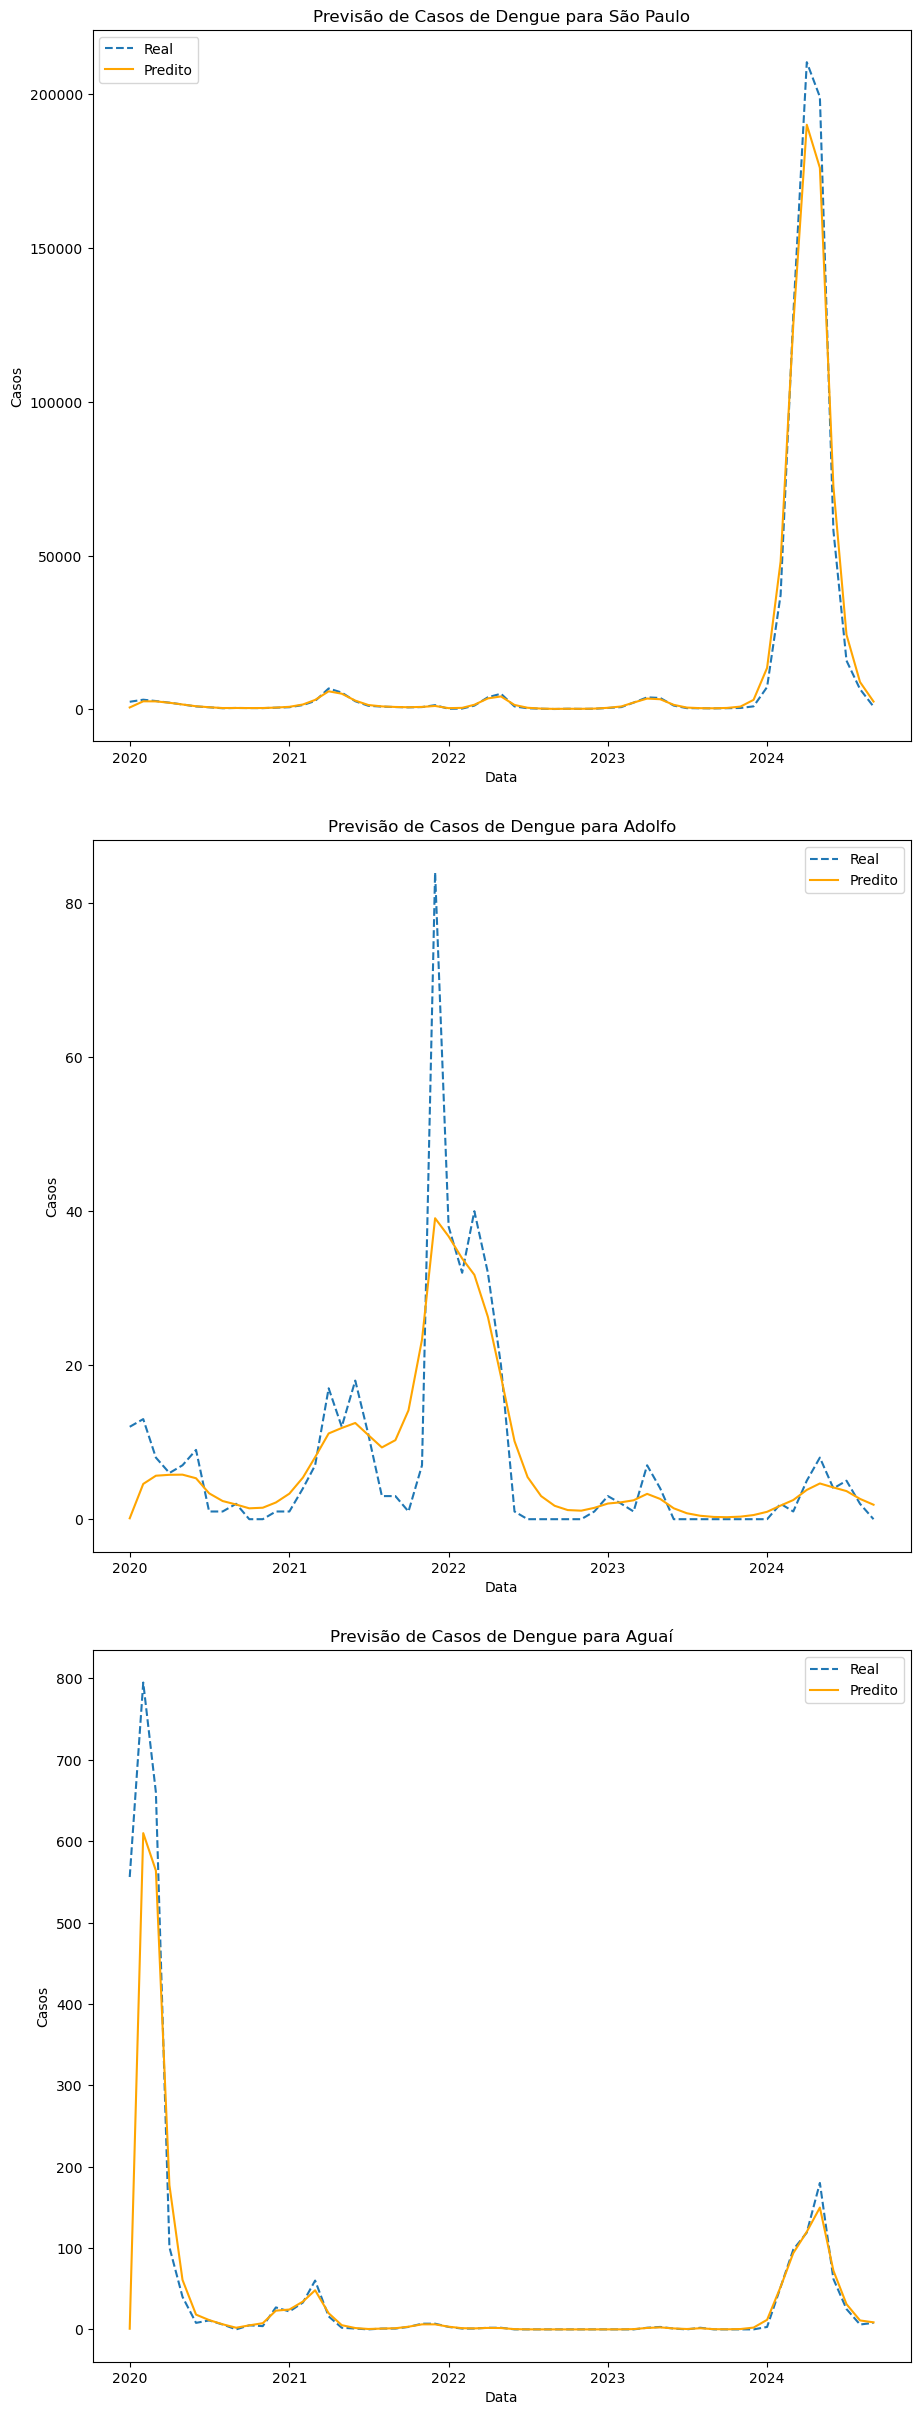

In [12]:
# Plotar os resultados para cada município desejado
fig, axs = plt.subplots(len(municipios_desejados), 1, figsize=(10, 25))
fig.tight_layout(pad=5.0)

for idx, municipio in enumerate(municipios_desejados):
    municipio_data = forecast_results[forecast_results['nm_municipio'] == municipio]
    axs[idx].plot(municipio_data['dt_notificacao'], municipio_data['Real'], label='Real', linestyle='--')
    axs[idx].plot(municipio_data['dt_notificacao'], municipio_data['Predito'], label='Predito', color='orange')
    axs[idx].set_title(f'Previsão de Casos de Dengue para {municipio}')
    axs[idx].set_xlabel('Data')
    axs[idx].set_ylabel('Casos')
    axs[idx].legend()

plt.show()